<a href="https://www.kaggle.com/code/chulsey/waterquality-eda?scriptVersionId=200373249" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Water Quality Exploratory Data Analysis



### Part I
The first part of this analysis contains setup and exploratory analysis, as well as a learning exercise comparing different ways of addressing NaN values in the data.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-quality-data/waterquality.csv


In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:

#Import data and examine
df_waterquality = pd.read_csv("../input/water-quality-data/waterquality.csv")
df_waterquality.shape



(2371, 8)

In [4]:
df_waterquality.head(10)

,Date,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
0,1989-05-11,NaN,NaN,7.5,0.3,0.9,17.0,-17.777778
1,1989-05-18,NaN,12.0,7.5,0.2,0.6,17.5,20.500000
2,1989-05-25,NaN,NaN,8.0,0.4,0.8,23.0,25.000000
3,1989-06-01,NaN,12.0,8.0,0.4,0.9,25.5,29.000000
4,1989-07-11,NaN,NaN,8.5,0.3,0.9,28.5,28.000000
5,1989-07-20,NaN,1.6,9.0,0.3,0.9,30.0,32.500000
6,1989-07-27,NaN,6.2,9.0,0.3,0.8,27.0,27.000000
7,1989-08-03,NaN,5.8,9.5,0.2,0.7,25.0,28.000000
8,1989-08-10,NaN,3.2,9.0,0.2,0.3,21.5,22.500000
9,1989-08-17,NaN,7.3,9.0,0.2,0.8,28.0,29.000000


In [5]:
df_waterquality.tail(10)

,Date,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
2361,2019-10-23,0.5,6.2,7.0,0.5,0.9,19.0,17.222222
2362,2019-10-23,0.0,NaN,6.5,0.9,1.0,20.0,17.222222
2363,2019-10-23,0.0,4.6,6.5,0.2,0.2,20.0,17.222222
2364,2019-10-28,0.1,NaN,6.5,0.7,1.0,13.0,9.444444
2365,2019-11-05,0.0,NaN,6.5,9.0,12.0,27.0,21.111111
2366,NaN,0.0,NaN,7.0,0.3,0.5,14.0,11.111111
2367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17.777778
2368,NaN,0.0,3.9,6.5,0.3,1.8,22.0,21.111111
2369,NaN,1.0,NaN,7.0,0.6,1.0,17.0,21.111111
2370,NaN,0.0,NaN,NaN,NaN,NaN,NaN,-17.777778


The following output gives the number of NaN values in each column.

In [6]:
df_waterquality.isna().sum()

Date                        5
Salinity (ppt)            130
DissolvedOxygen (mg/L)    851
pH                         95
SecchiDepth (m)            73
WaterDepth (m)             71
WaterTemp (C)             121
AirTemp (C)                 0
dtype: int64

Drop 5 rows with NaN dates (2 of those rows have almost not information).

In [7]:
df_waterquality = df_waterquality.dropna(subset=['Date'])

I'd like to know the temporal span of the data.

In [8]:
#Get date range

#Convert date column to datetime format
df_waterquality['Date'] = pd.to_datetime(df_waterquality['Date'])
min_date = df_waterquality['Date'].min()
max_date = df_waterquality['Date'].max()

print("Start date:", min_date)
print("End date:", max_date)

Start date: 1989-05-11 00:00:00
End date: 2019-11-05 00:00:00


Data is recorded from May 11th, 1989 to November, 11th, 2019. A span of roughly 30 years. 

Index the dataframe by Date

In [9]:
df_waterquality['Date'] = pd.to_datetime(df_waterquality['Date'], errors='coerce')
df_waterquality = df_waterquality.set_index('Date')
df_waterquality

,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
Date,,,,,,,
1989-05-11,NaN,NaN,7.5,0.3,0.9,17.0,-17.777778
1989-05-18,NaN,12.0,7.5,0.2,0.6,17.5,20.500000
1989-05-25,NaN,NaN,8.0,0.4,0.8,23.0,25.000000
1989-06-01,NaN,12.0,8.0,0.4,0.9,25.5,29.000000
1989-07-11,NaN,NaN,8.5,0.3,0.9,28.5,28.000000
...,...,...,...,...,...,...,...
2019-10-23,0.5,6.2,7.0,0.5,0.9,19.0,17.222222
2019-10-23,0.0,NaN,6.5,0.9,1.0,20.0,17.222222
2019-10-23,0.0,4.6,6.5,0.2,0.2,20.0,17.222222


#### Visualizing data

We first obtain desciptive statistics of the data. (NaN values are excluded)

In [10]:
df_waterquality.describe()

,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
count,2237.000000,1519.000000,2273.000000,2295.000000,2297.000000,2247.000000,2366.000000
mean,0.717903,6.648071,7.168654,0.525061,0.762118,18.062666,15.688636
std,1.231624,2.506441,0.788865,0.473924,0.621125,8.302898,10.278043
min,0.000000,0.000000,0.300000,0.000000,0.010000,0.000000,-17.777778
25%,0.000000,4.800000,6.500000,0.300000,0.400000,11.000000,8.888889
50%,0.000000,6.500000,7.000000,0.400000,0.650000,19.000000,16.666667
75%,1.000000,8.500000,7.500000,0.650000,0.950000,25.000000,23.888889
max,9.000000,15.100000,9.900000,9.000000,12.000000,74.000000,33.500000


How do different methods of dealing with NaNs affect data?    
Plot Salinity, Dissolved Oxygn, and pH distributions to compare removal, mean and mediam imputation of NaNs.  

With REMOVAL.   
We remove NaNs for each column at a time, independently.

In [11]:
##This code displays all outputs and not just the last one 
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

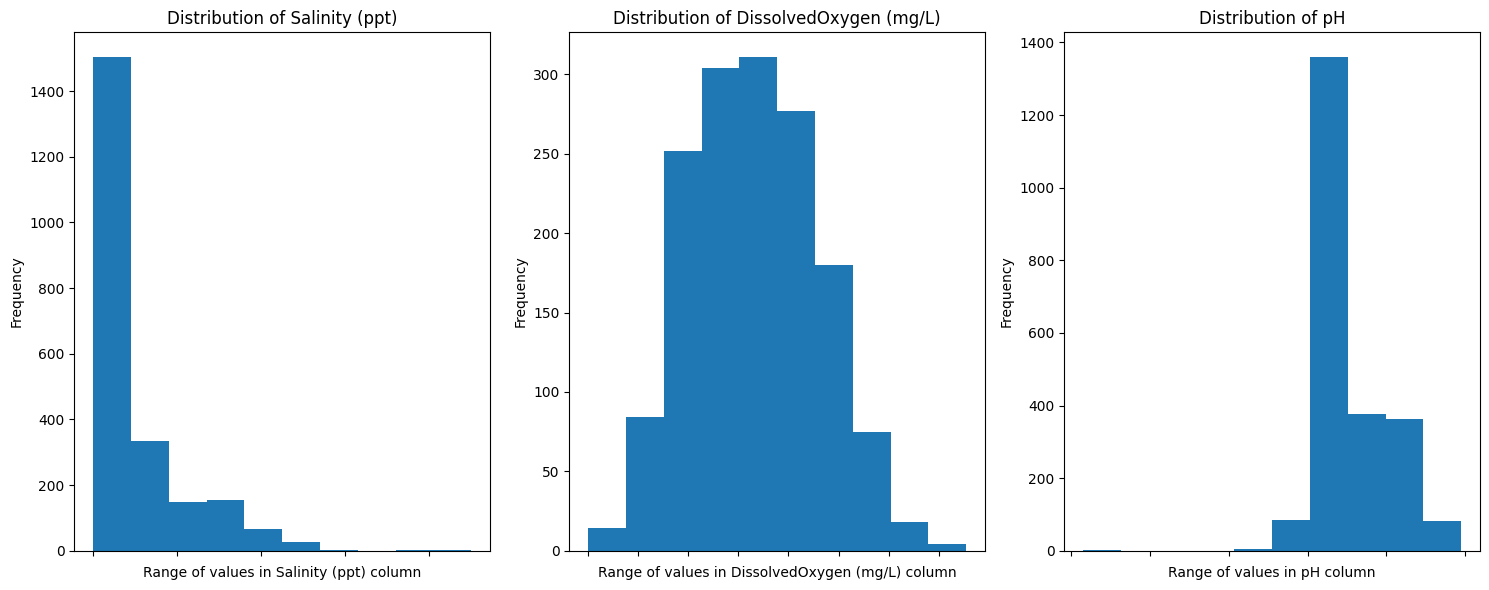

In [12]:
df = df_waterquality.iloc[:,:3]
# Plot the distribution 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# Loop through the columns and plot
for i, col in enumerate(df.columns):
    #print(i,col)
    df1= df
    df1 = df.dropna(subset=[col])
    axes[i].hist(df1[col])
    #sns.histplot(data=df1[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')  
    axes[i].set_xticklabels(())
    axes[i].set_xlabel(f'Range of values in {col} column')
    axes[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

With MEAN imputation

In [13]:
df = df_waterquality
for i in df.columns:
    df[i] = df[i].fillna(df[i].mean())
df.head(10)


,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
Date,,,,,,,
1989-05-11,0.717903,6.648071,7.5,0.3,0.9,17.0,-17.777778
1989-05-18,0.717903,12.000000,7.5,0.2,0.6,17.5,20.500000
1989-05-25,0.717903,6.648071,8.0,0.4,0.8,23.0,25.000000
1989-06-01,0.717903,12.000000,8.0,0.4,0.9,25.5,29.000000
1989-07-11,0.717903,6.648071,8.5,0.3,0.9,28.5,28.000000
1989-07-20,0.717903,1.600000,9.0,0.3,0.9,30.0,32.500000
1989-07-27,0.717903,6.200000,9.0,0.3,0.8,27.0,27.000000
1989-08-03,0.717903,5.800000,9.5,0.2,0.7,25.0,28.000000
1989-08-10,0.717903,3.200000,9.0,0.2,0.3,21.5,22.500000


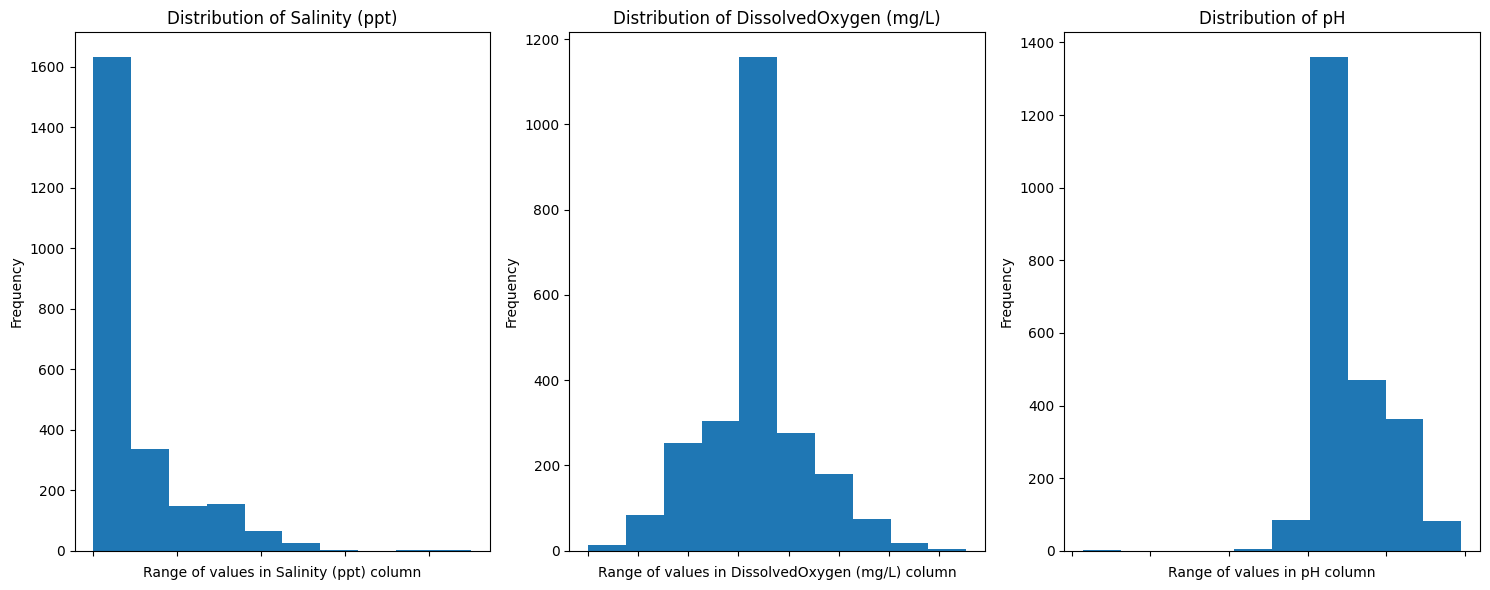

In [14]:
df = df_waterquality.iloc[:,:3]
# Plot the distribution 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# Loop through the columns and plot
for i, col in enumerate(df.columns):
    #print(i,col)
    df1= df
    axes[i].hist(df1[col])
    #sns.histplot(data=df1[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')  
    axes[i].set_xticklabels(())
    axes[i].set_xlabel(f'Range of values in {col} column')
    axes[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

With MEDIAN imputation

In [15]:
df = df_waterquality
for i in df.columns:
    df[i] = df[i].fillna(df[i].median())
df.head(10)

,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
Date,,,,,,,
1989-05-11,0.717903,6.648071,7.5,0.3,0.9,17.0,-17.777778
1989-05-18,0.717903,12.000000,7.5,0.2,0.6,17.5,20.500000
1989-05-25,0.717903,6.648071,8.0,0.4,0.8,23.0,25.000000
1989-06-01,0.717903,12.000000,8.0,0.4,0.9,25.5,29.000000
1989-07-11,0.717903,6.648071,8.5,0.3,0.9,28.5,28.000000
1989-07-20,0.717903,1.600000,9.0,0.3,0.9,30.0,32.500000
1989-07-27,0.717903,6.200000,9.0,0.3,0.8,27.0,27.000000
1989-08-03,0.717903,5.800000,9.5,0.2,0.7,25.0,28.000000
1989-08-10,0.717903,3.200000,9.0,0.2,0.3,21.5,22.500000


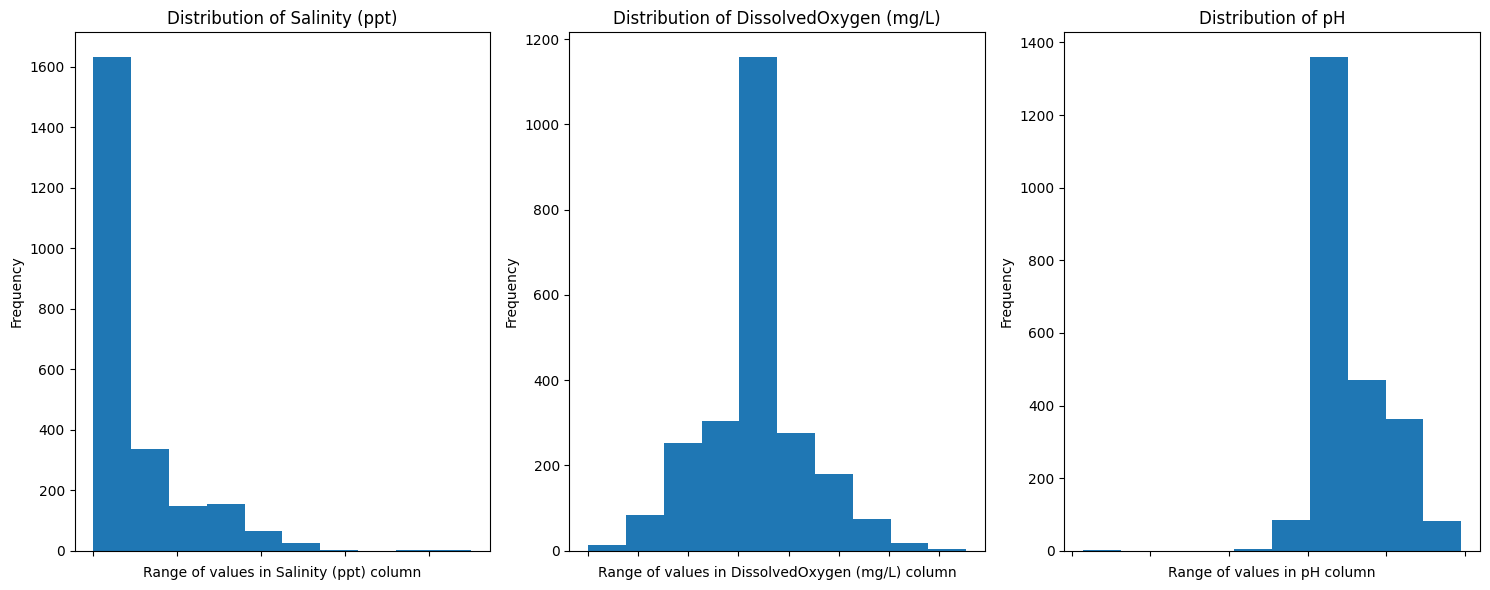

In [16]:
df = df_waterquality.iloc[:,:3]
# Plot the distribution 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# Loop through the columns and plot
for i, col in enumerate(df.columns):
    #print(i,col)
    df1= df
    axes[i].hist(df1[col])
    #sns.histplot(data=df1[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')  
    axes[i].set_xticklabels(())
    axes[i].set_xlabel(f'Range of values in {col} column')
    axes[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

While mean and median imputation methods have a weaker effect on the Salinity and pH variable distributions, the DissolvedOxygen variable exhibits a drastic change in the distribution mode. This is because the number of NaNs in this variable is large (~850 entries).   


### Part II

In the second part, we investigate the correlation between variables and select pairs to further investigate their relationship with linear regression.

#### Correlation

Proceeding with MEDIAN imputation method, we next visualize relationships between variables by plotting a heatmat of the correlation matrix.

In [17]:
df = df_waterquality
for i in df.columns:
    df[i] = df[i].fillna(df[i].median())


                        Salinity (ppt)  DissolvedOxygen (mg/L)        pH  \
Salinity (ppt)                1.000000                0.264953  0.283388   
DissolvedOxygen (mg/L)        0.264953                1.000000  0.045207   
pH                            0.283388                0.045207  1.000000   
SecchiDepth (m)              -0.148558               -0.045275 -0.146598   
WaterDepth (m)               -0.081388               -0.003337 -0.162026   
WaterTemp (C)                -0.008151               -0.403291  0.187907   
AirTemp (C)                   0.044265               -0.241926  0.149557   

                        SecchiDepth (m)  WaterDepth (m)  WaterTemp (C)  \
Salinity (ppt)                -0.148558       -0.081388      -0.008151   
DissolvedOxygen (mg/L)        -0.045275       -0.003337      -0.403291   
pH                            -0.146598       -0.162026       0.187907   
SecchiDepth (m)                1.000000        0.815946      -0.030213   
WaterDepth (m)       

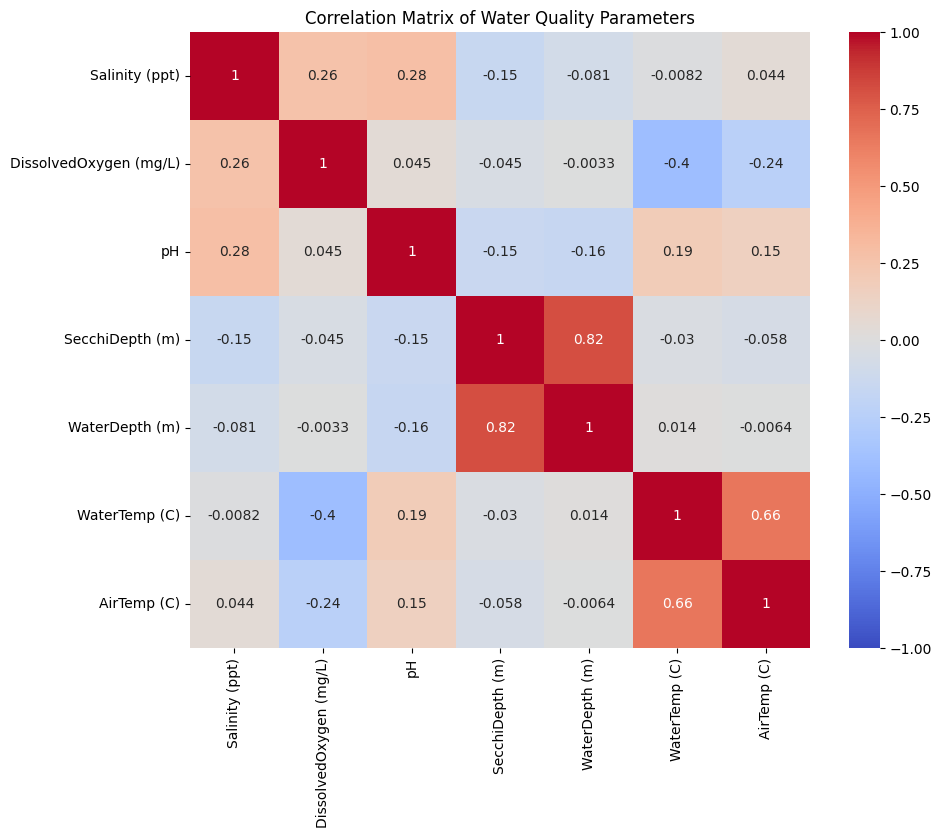

In [18]:
# Calculate correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Water Quality Parameters')
plt.show()

The heatmap indicates high positive correlation between SecchiDepth and WaterDepth as well as between WaterTemp and AirTemp. A moderate positive correlation between DissolvedOxygen and Salinity, between pH and Salinity, between pH and WaterRemp and between pH and AirTemp. It also indicates a moderate negative correlation between DissolvedOxygen and WaterTemp and between DissolvedOxygen and AirTemp.

#### Linear Regression

Goal is to find linear relationship between one or more independent variables and a dependent variable that best describes the data.   
In simplest form the model is $Y = \beta_0 + \beta_1 X + \epsilon$. $\epsilon$ is the residual or error term (difference between data points $Y$ and the predicted $Y$). The most common method for fitting a linear regression model is to minimize the sum of squared residuals (OLS).

sbs.pairplot uses OLS method to produce a linear function that fits the data. It is mainly used for visual exploration of linear relationships. Using sbs.pairplot does not give statistical outputs like coefficients, p-values or R-squared. R-squared values which tells the proportion of variance in the dependent variable explained by the independent variable.
p-values help determine if the relationship is significant, and how strong it is.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

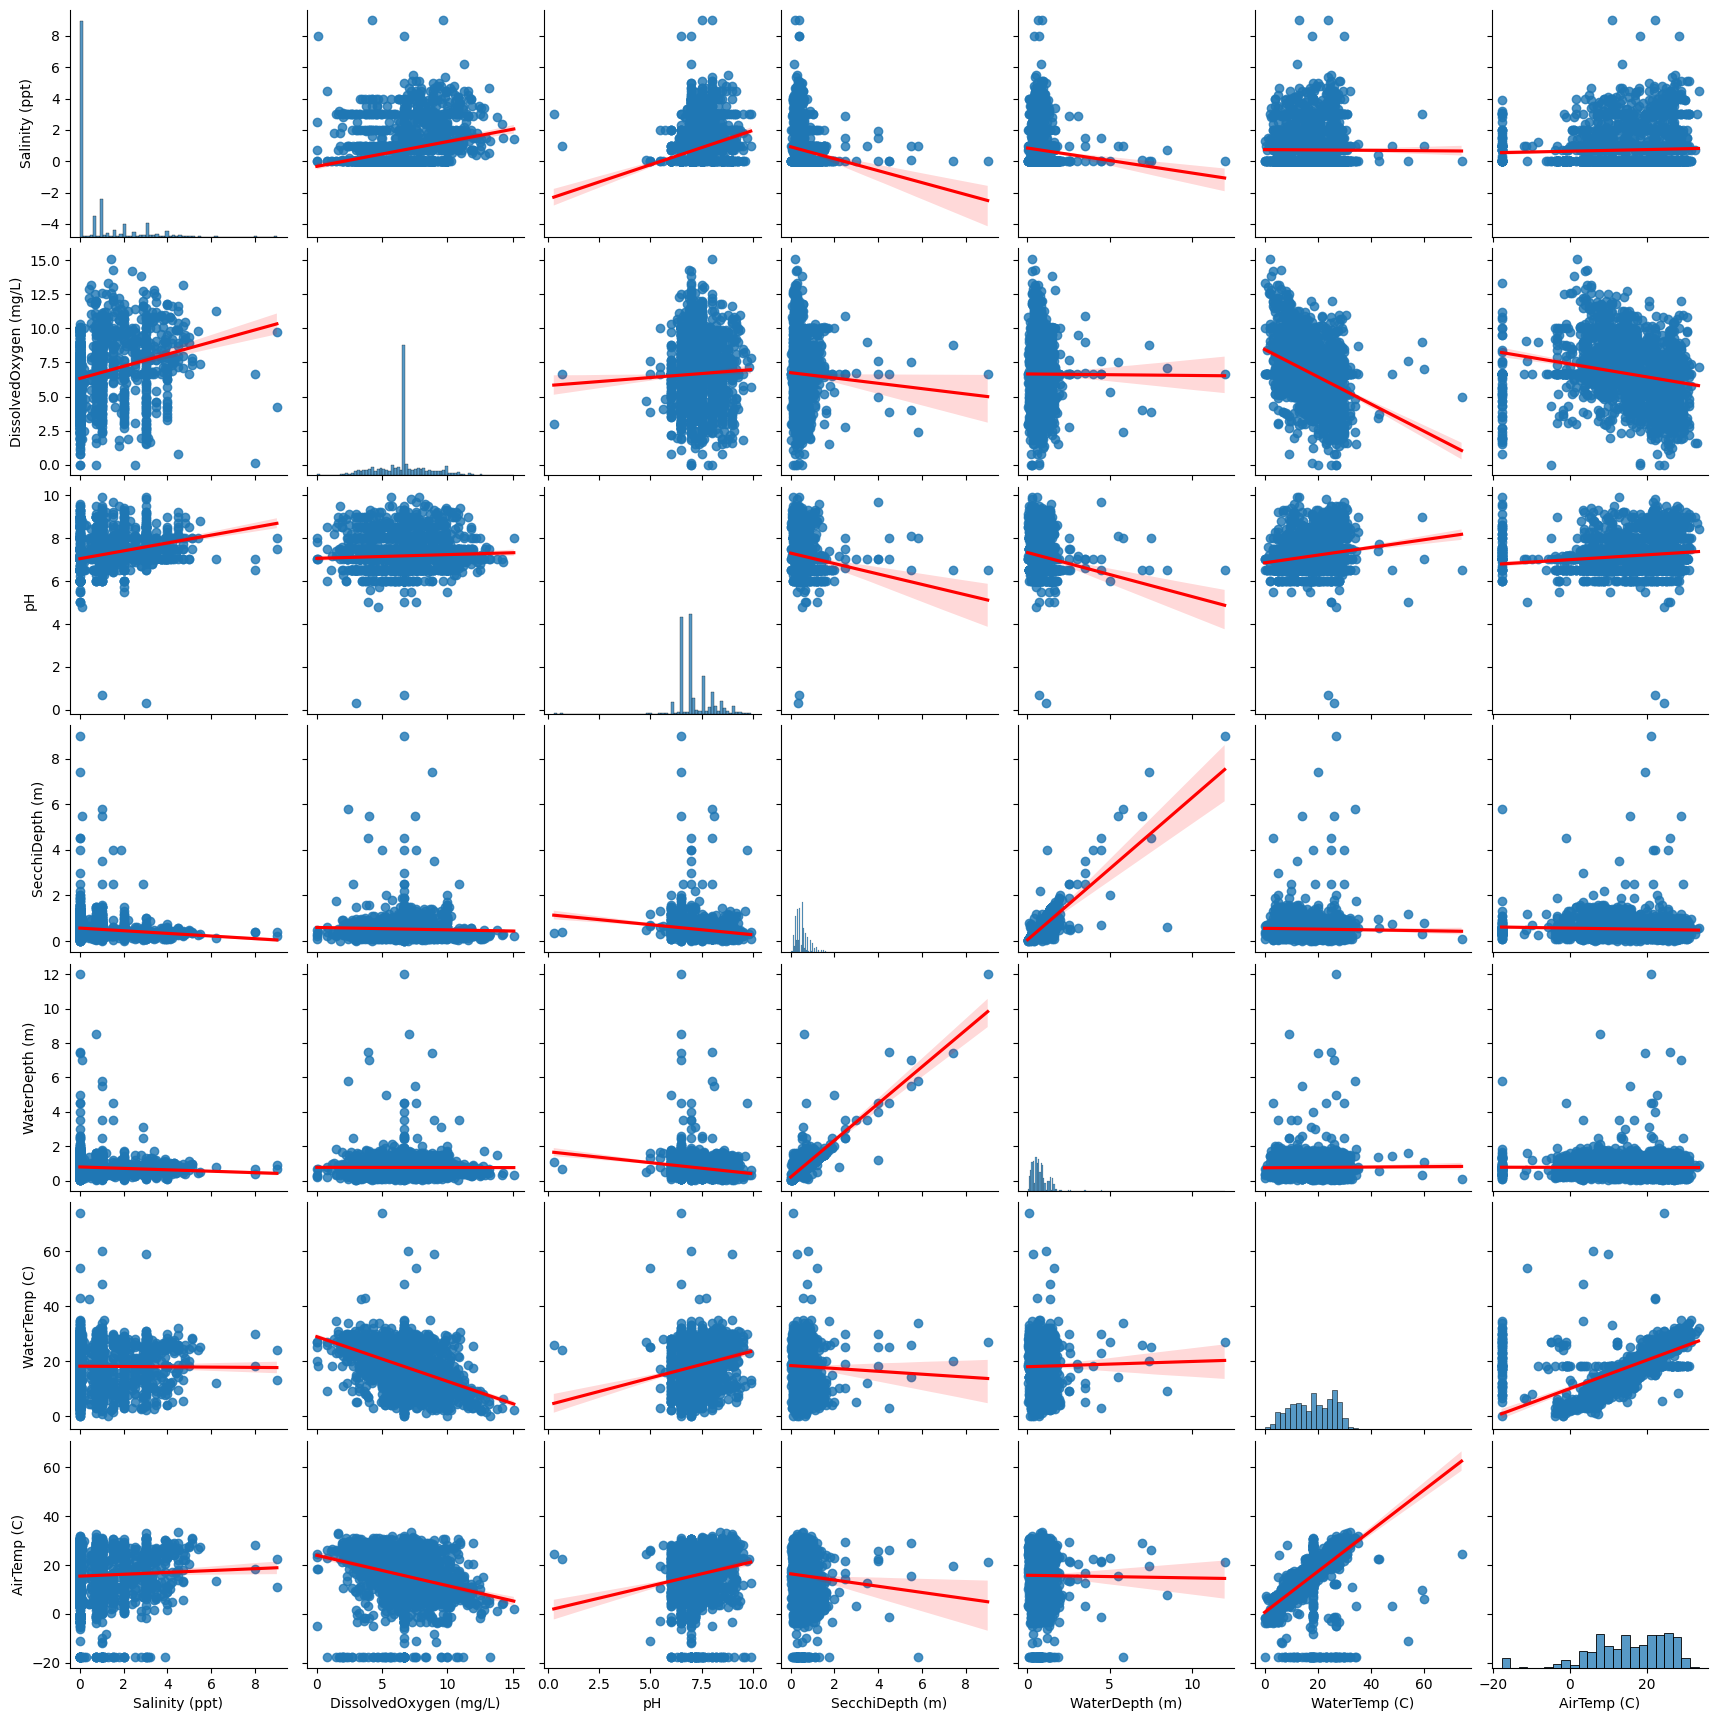

In [19]:
# Pair plot
sns.pairplot(df, kind='reg',plot_kws={'line_kws':{'color':'red'}})
plt.show()

# Scatter plot example for specific pair of variables
#plt.figure(figsize=(10, 6))
#sns.scatterplot(data=df, x='salinity', y='pH')
#plt.title('Scatter Plot of Salinity vs. pH')
#plt.xlabel('Salinity (ppt)')
#plt.ylabel('pH')
#plt.show()

Suppose we wanted to explore the relationship between Salinity and pH. We can use scikitlearn library to create a linear regression model and make predictions.

Slope: 0.18296738154738962, Intercept: 7.0373008485418955
R-squared: 0.08030855539503601


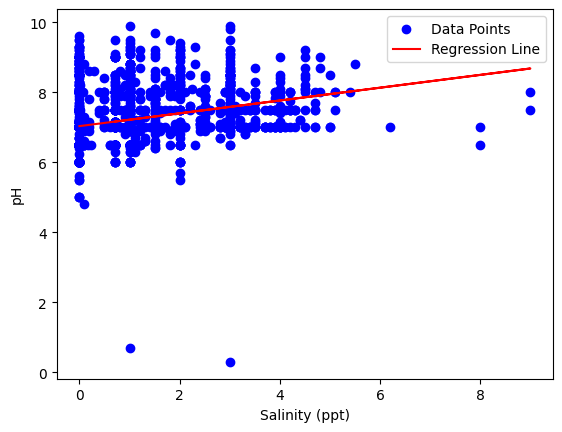

In [20]:
from sklearn.linear_model import LinearRegression

X = df[['Salinity (ppt)']]
Y = df['pH']

# 1. Create and fit the linear regression model
#    Fit model using a training set (subset of the data)
model = LinearRegression()
model.fit(X, Y)

# 2. Make predictions
Y_pred = model.predict(X)

# 3. Get the slope and intercept of the linear regression line
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope: {slope}, Intercept: {intercept}")

# 4. Calculate the R-squared value
r_squared = model.score(X, Y)
print(f"R-squared: {r_squared}")

# 5. Plot the data points and the regression line
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('Salinity (ppt)')
plt.ylabel('pH')
#plt.title('Linear Regression with sklearn')
plt.legend()
plt.show()

In this case Salinity doesn't seem to affect pH significantly; notice the low R-squared value.   

We repeat the previous steps for the variables of AirTemp and WaterTemp.

Slope: 0.5172831942332574, Intercept: 9.947197911516136
R-squared: 0.43175720564089803


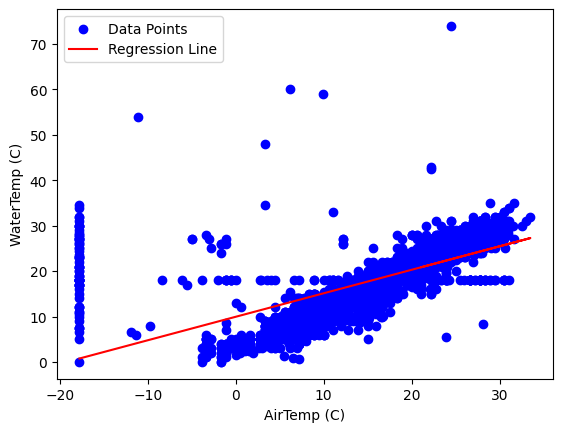

In [21]:
X = df[['AirTemp (C)']]
Y = df['WaterTemp (C)']

# 1. Create and fit the linear regression model
#    Fit model using a training set (subset of the data)
model = LinearRegression()
model.fit(X, Y)

# 2. Make predictions
Y_pred = model.predict(X)

# 3. Get the slope and intercept of the linear regression line
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope: {slope}, Intercept: {intercept}")

# 4. Calculate the R-squared value
r_squared = model.score(X, Y)
print(f"R-squared: {r_squared}")

# 5. Plot the data points and the regression line
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('AirTemp (C)')
plt.ylabel('WaterTemp (C)')
#plt.title('Linear Regression with sklearn')
plt.legend()
plt.show()

This model results in larger R-squared value, and it is logical that AirTemp would affect Water Temp (and vice versa).

#### Outliers 

In the next analysis, we exclude outliers from data and re produce the linear regression.


  
In the Salinity vs pH scatterplot, we notice two outliers which correspond to extremely low pH values. We set up a threshold pH value to exclude outliers:
* pH $\geq$ 5


In the AirTemp vs WaterTemp plot we notice some strange measurements. When we observe the AirTemp value of ~ -18 C (well below freezing), the corresponding water temp varies from 0 C to ~ 35 C (hot), is this physically possible? Similarly for the fixed WaterTemp value of ~ 19 C (cool), AirTemp varies from -10 C (well below freezing) to ~ 30 C (hot). There are also other few outliers above the main cluster.   

We use a simple approach where we define upper and lowe limits for WaterTemp based on corresponding AirTemp values:   
* When AirTemp is close to freezing, the WaterTemp should be < 10 C   
* When AirTemp is high (> 30 C), WaterTemp should not be freezing. 

In [22]:
low_ph_threshold = 5

# Filter the DataFrame to exclude rows where pH is below the threshold
df_filtered_pH = df[df['pH'] >= low_ph_threshold]

conditions = (
    ~((df_filtered_pH['AirTemp (C)'] < 0) & (df_filtered_pH['WaterTemp (C)'] > 10)) &  # Low air, high water
    ~((df_filtered_pH['AirTemp (C)'] > 30) & (df_filtered_pH['WaterTemp (C)'] < 5))    # High air, low water
)
    
# Filter DataFrame to keep only rows that meet these physical conditions
df_filtered = df_filtered_pH[conditions]


Slope: 0.18709220945784275, Intercept: 7.035625386524345
R-squared: 0.09192065361308288


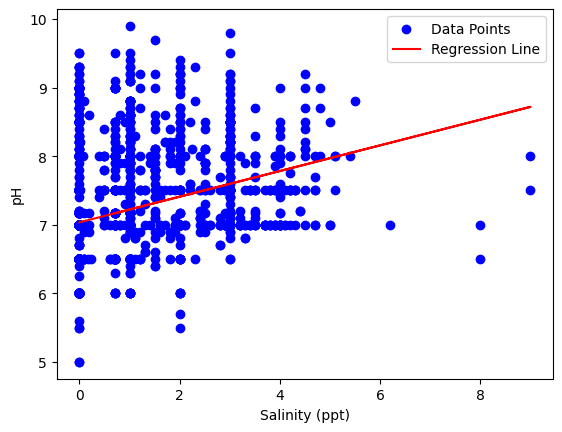

In [23]:
X = df_filtered[['Salinity (ppt)']]
Y = df_filtered['pH']

# 1. Create and fit the linear regression model
#    Fit model using a training set (subset of the data)
model = LinearRegression()
model.fit(X, Y)

# 2. Make predictions
Y_pred = model.predict(X)

# 3. Get the slope and intercept of the linear regression line
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope: {slope}, Intercept: {intercept}")

# 4. Calculate the R-squared value
r_squared = model.score(X, Y)
print(f"R-squared: {r_squared}")

# 5. Plot the data points and the regression line
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('Salinity (ppt)')
plt.ylabel('pH')
#plt.title('Linear Regression with sklearn')
plt.legend()
plt.show()

Slope: 0.8233779494384373, Intercept: 4.085426670850504
R-squared: 0.7727309673075665


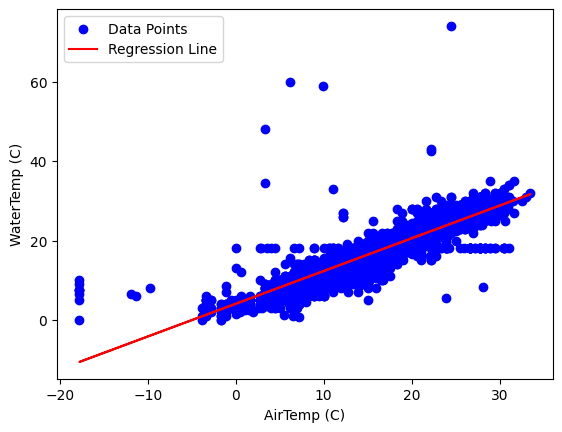

In [24]:
X = df_filtered[['AirTemp (C)']]
Y = df_filtered['WaterTemp (C)']

# 1. Create and fit the linear regression model
#    Fit model using a training set (subset of the data)
model = LinearRegression()
model.fit(X, Y)

# 2. Make predictions
Y_pred = model.predict(X)

# 3. Get the slope and intercept of the linear regression line
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope: {slope}, Intercept: {intercept}")

# 4. Calculate the R-squared value
r_squared = model.score(X, Y)
print(f"R-squared: {r_squared}")

# 5. Plot the data points and the regression line
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('AirTemp (C)')
plt.ylabel('WaterTemp (C)')
#plt.title('Linear Regression with sklearn')
plt.legend()
plt.show()

After removing physical outliers, we observe that the linear regression does not change much in the first plot (Salinity vs pH), the R_squared value is still very low indicating low correlation between these variables. However in the second plot of AirTemp vs WaterTemp, the linear regression gives a much better R-squared value. Previously, R-squared was ~ 0.4 indicating weak correlation between AirTemp and Watertemp. Currently, the R-squared value is ~0.7 indicating a strong correlation between these two variables which is what is physically expected. 

While this was a visual method of identifying outliers, one can also use statistical techniques such as Z-scores or IQR to identify and remove outliers.

In [25]:
df_filtered.shape

(2278, 7)

#### LR using Training Data

We re produce the linear regression fit using training data instead of all data and plot again. Describe the differences.